In [1]:
import torch
import os
import pickle
from collections import deque
from librarybantuan.plot import feature_importance
from model import Linear_QNet
import matplotlib.pyplot as plt
import numpy as np


c:\Users\ramab\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
visual_range = 9

In [3]:
model = Linear_QNet(input_size=visual_range**2+5, hidden_size=128, output_size=3)
model.load()

In [6]:
memory = list(pickle.load(open('./model/memory.mem', 'rb')))
states, actions, rewards, next_states, game_overs = zip(*memory)

len(memory)

16878

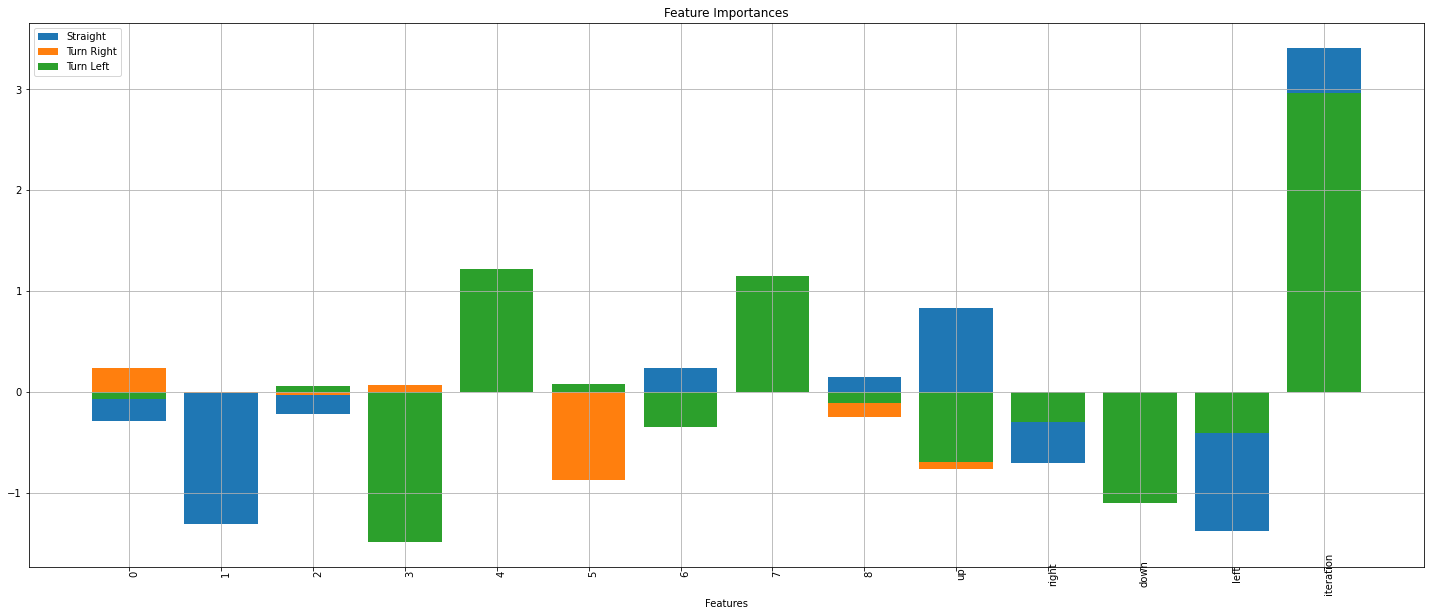

In [7]:
feature_names = list(np.arange(visual_range**2)) + ['up', 'right', 'down', 'left', 'iteration']
# target_names = ['Straight', 'Turn Right', 'Turn Left']
x_pos = (np.arange(len(feature_names)))
plt.figure(figsize=(25, 10))
plt.title('Feature Importances')
plt.xlabel("Features")
plt.xticks(x_pos, feature_names, wrap=True, rotation=90)

titles = ['Straight', 'Turn Right', 'Turn Left']
for target in range(3):
    feature_importance(visual_range, model, states[-1000:], x_pos, target=target, label=titles[target])

plt.legend()
plt.show()

100 data = 1.7s <br>
1000 data = 1m 14.3s <br>
5286 data = 